In [ ]:
import pandas as pd

# 加载数据集
file_path = 'dataset/rating_score.xlsx'
data = pd.read_excel(file_path)

# 显示数据集的前几行以了解其结构
data.head()


,score,时长,box_office_category,豆瓣评价人数,获奖,提名,国民总收入亿元,人均国内总产值元,第三产业增加值亿元,国内生产总值亿元,...,others_动画,others_喜剧,others_奇幻,others_恐怖,others_悬疑,others_战争,others_爱情,others_科幻,others_纪录片,others_舞台艺术
0,9.6,110.0,6,1800000,13,10,983751.2,70077.692,535370.99,890304.85,...,1,0,0,0,0,0,0,0,0,0
1,9.5,130.0,4,1700000,23,36,983751.2,70077.692,535370.99,890304.85,...,0,0,0,0,0,0,0,0,0,0
2,9.5,121.0,3,170781,0,0,983751.2,70077.692,535370.99,890304.85,...,0,0,0,0,0,0,0,0,0,0
3,9.5,111.0,3,639625,0,0,983751.2,70077.692,535370.99,890304.85,...,0,0,0,0,0,0,0,0,0,0
4,9.5,120.0,3,15627,4,3,983751.2,70077.692,535370.99,890304.85,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

# 定义特征和目标变量
X = data.drop('score', axis=1)
y = data['score']

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((534, 43), (134, 43), (534,), (134,))

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 定义随机森林回归模型
rf = RandomForestRegressor(random_state=42)

# 定义网格搜索的参数范围
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用网格搜索寻找最优参数
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 获取最优模型
best_rf = grid_search.best_estimator_

# 对测试集进行预测
y_pred = best_rf.predict(X_test)

# 计算MSE和R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出最优参数、MSE和R²
best_params = grid_search.best_params_
mse, r2, best_params


Fitting 3 folds for each of 216 candidates, totalling 648 fits


(0.5842594029850743,
 0.4349843576646585,
 {'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50})

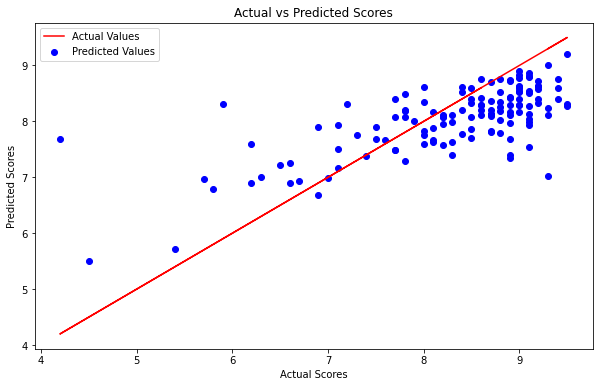

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.plot(y_test, y_test, color='red', label='Actual Values')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.show()


F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20135 missing from c

F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38498 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20307 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23621 missing from c

F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 25552 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 21517 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 30011 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26222 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 21095 missing from current fon

F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 25112 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20105 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20869 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 38134 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24149 missing from current fon

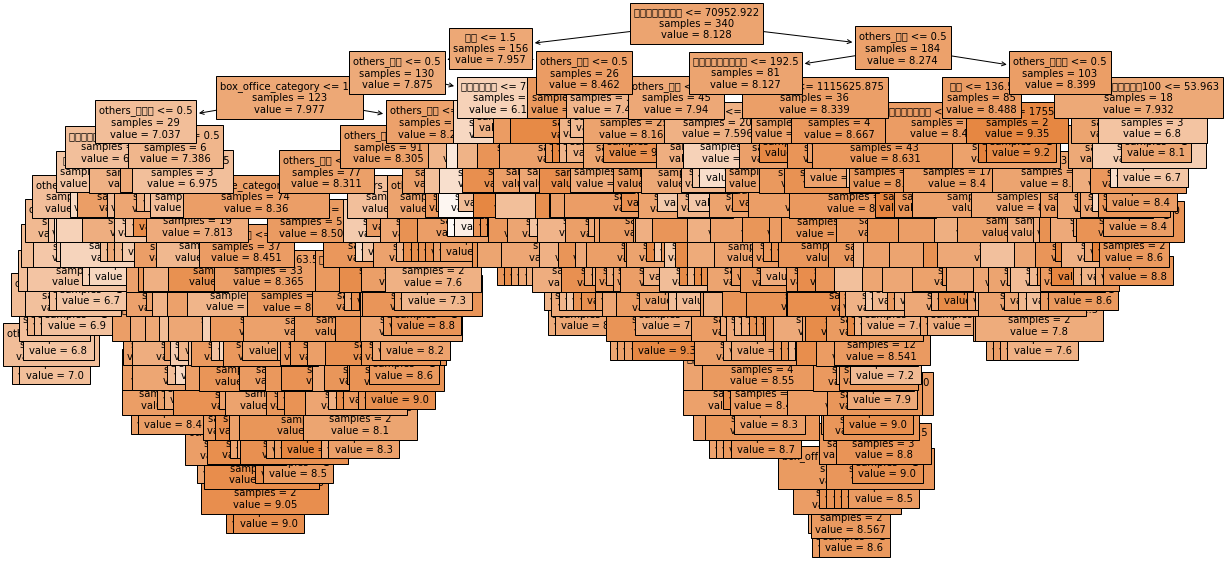

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 选择一个决策树进行可视化（例如，选择第一个决策树）
estimator = best_rf.estimators_[0]

# 设置图形大小
plt.figure(figsize=(20,10))

# 绘制决策树
plot_tree(estimator, 
          feature_names=X.columns, 
          class_names=['score'], 
          filled=True, 
          impurity=False, 
          fontsize=10)

# 显示图形
plt.show()
